In [3]:
import pandas as pd
df = pd.read_csv("bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# data exploration 

In [5]:
df.shape

(550, 7)

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [16]:
df.isnull()

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [19]:
df.nunique()

Title               351
Author              248
Rating               14
Reviews             346
Price                40
Publication Year     11
Genre                 2
dtype: int64

# Data Cleaning

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [31]:
df["Price"] = df.Price.astype(float)
df.head()

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


# Analyzing the data

In [13]:
# Finding the Author Popularity
author_counts = df["Author"].value_counts()
author_counts

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [15]:
# Average Rating by Genre
avg_review = df.groupby("Genre")["Rating"].mean()
avg_review

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64

# distribution analysis

([<matplotlib.axis.XTick at 0x1fdbe79f460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

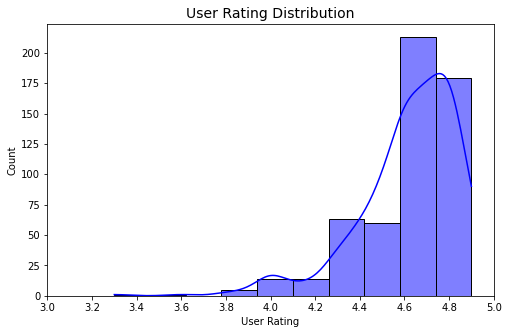

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"],bins=10, kde = 10, color='blue',edgecolor='black')
plt.title("User Rating Distribution",fontsize=14)
plt.xlabel("User Rating")
plt.ylabel("Count")
plt.xticks([i/10 for i in range(30, 51, 2)])

# Log Scale for Reviews

Text(0, 0.5, 'Count')

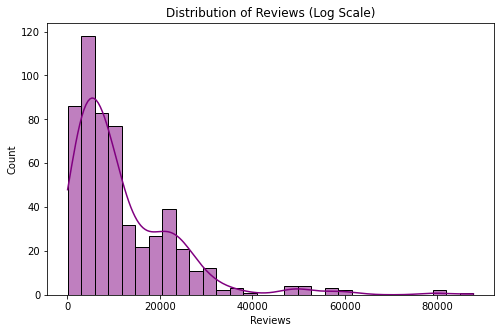

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df["Reviews"],bins=30,color='purple', kde=True)
plt.title("Distribution of Reviews (Log Scale)")
plt.xlabel("Reviews")
plt.ylabel("Count")

Text(0.5, 0, 'Price')

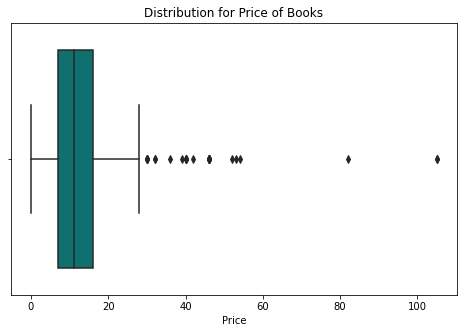

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price"],color='teal')
plt.title("Distribution for Price of Books")
plt.xlabel("Price")

# Top Bottom Analysis

In [36]:
# top 10 reviewed books
top10_reviews = df.sort_values(by="Reviews", ascending=False).drop_duplicates(subset="Title").head(10)
top10_reviews

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15.0,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18.0,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11.0,2018,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9.0,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13.0,2014,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11.0,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9.0,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14.0,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39.0,2014,Fiction


In [41]:
#most expensive books
most_expensive_books = df.sort_values(by='Price',ascending=False).head(5)
most_expensive_books

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105.0,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105.0,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82.0,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54.0,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53.0,2009,Non Fiction


In [42]:
most_cheapest_books =df.sort_values(by='Price',ascending=True).head(5)
most_cheapest_books

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0.0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0.0,2013,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0.0,2017,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0.0,2014,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,2013,Fiction


In [44]:
#Rating
highest_rated_books = df.sort_values(by="Rating",ascending = False).head(5)
highest_rated_books

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5.0,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6.0,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8.0,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4.0,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4.0,2018,Fiction


In [46]:
lowest_rated_books = df.sort_values(by="Rating",ascending = True).head(5)
lowest_rated_books

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12.0,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19.0,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20.0,2014,Fiction


# Frequency Analysis

In [53]:
# most common author
top_authors =  df.Author.value_counts().head(5)
top_authors

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Name: Author, dtype: int64

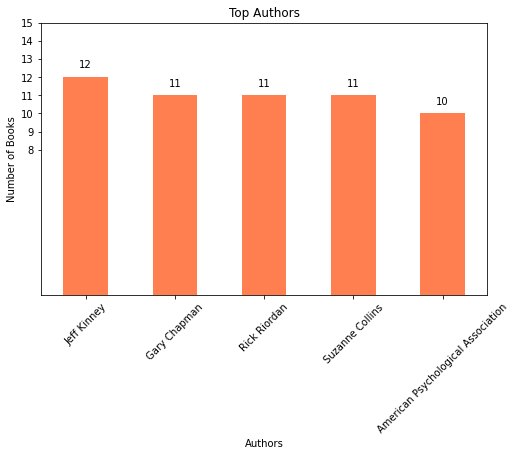

In [59]:
plt.figure(figsize=(8,5))
top_authors.plot(kind="bar",color='coral')
plt.title("Top Authors")
plt.xlabel("Authors")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.yticks(range(8, top_authors.max()+4, 1)) 
for i, value in enumerate(top_authors):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

In [61]:
#most frequent genre
genre_freq = df.Genre.value_counts()
genre_freq

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Text(0, 0.5, 'Count')

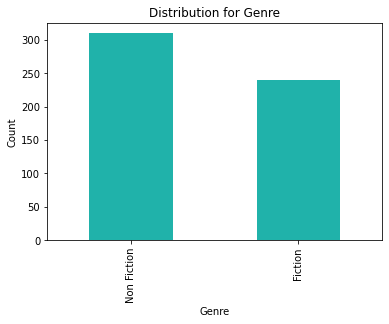

In [62]:
genre_freq.plot(kind="bar",color="lightseagreen")
plt.title("Distribution for Genre")
plt.xlabel("Genre")
plt.ylabel("Count")

In [51]:
df['Publication Year'].value_counts().sort_index()

2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Publication Year, dtype: int64

# Comparative Analysis

In [63]:
#genre Comparison
genre_stats = df.groupby("Genre")[["Rating","Price","Reviews"]].mean().round(2)

In [64]:
genre_stats

,Rating,Price,Reviews
Genre,,,
Fiction,4.65,10.85,15683.79
Non Fiction,4.60,14.84,9065.15


(array([0, 1]), [Text(0, 0, 'Fiction'), Text(1, 0, 'Non Fiction')])

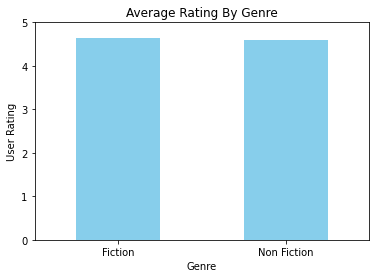

In [66]:
genre_stats["Rating"].plot(kind="bar",color="skyblue",title="Average Rating By Genre")
plt.ylabel("User Rating")
plt.ylim(0,5)
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Fiction'), Text(1, 0, 'Non Fiction')])

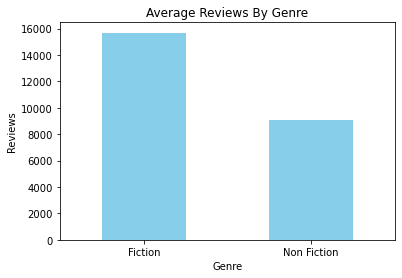

In [71]:
genre_stats["Reviews"].plot(kind="bar",color="skyblue",title="Average Reviews By Genre")
plt.ylabel("Reviews")
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Fiction'), Text(1, 0, 'Non Fiction')])

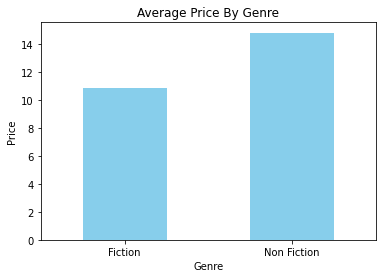

In [72]:
genre_stats["Price"].plot(kind="bar",color="skyblue",title="Average Price By Genre")
plt.ylabel("Price")
plt.xticks(rotation=0)

In [74]:
# yearly trends
yearly_stats = df.groupby("Publication Year")[["Rating","Price","Reviews"]].mean().round(2)
yearly_stats

,Rating,Price,Reviews
Publication Year,,,
2009,4.58,15.40,4710.12
2010,4.56,13.48,5479.62
2011,4.56,15.10,8100.82
2012,4.53,15.30,13090.92
2013,4.55,14.60,13098.14
2014,4.62,14.64,15859.94
2015,4.65,10.42,14233.38
2016,4.68,13.18,14196.00
2017,4.66,11.38,12888.40


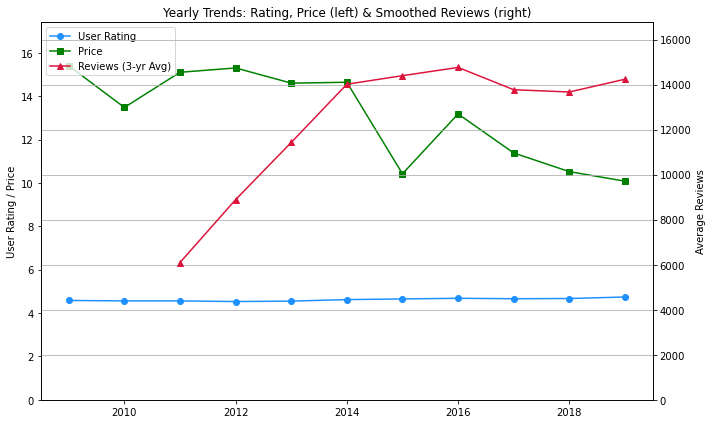

In [78]:
# Apply 3-year rolling average to reviews
yearly_stats['Reviews Smoothed'] = yearly_stats['Reviews'].rolling(3).mean()

# Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Rating and Price
ax1.plot(yearly_stats.index, yearly_stats['Rating'], marker='o', label='User Rating', color='dodgerblue')
ax1.plot(yearly_stats.index, yearly_stats['Price'], marker='s', label='Price', color='green')
ax1.set_ylabel("User Rating / Price")
ax1.set_ylim(0, yearly_stats[['Rating', 'Price']].values.max() + 2)

# Right Y-axis: Reviews
ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['Reviews Smoothed'], marker='^', label='Reviews (3-yr Avg)', color='crimson')
ax2.set_ylabel("Average Reviews")
ax2.set_ylim(0, yearly_stats['Reviews Smoothed'].max() + 2000)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("Yearly Trends: Rating, Price (left) & Smoothed Reviews (right)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()



In [79]:
author_rating_stats = df.groupby("Author").agg({"Title":"count","Rating":"mean"}).rename(columns={"Title":"Book Count"})
top_rated_authors = author_rating_stats[author_rating_stats['Book Count']>2]
top_rated_authors = top_rated_authors.sort_values(by='Rating',ascending=False).head(10)
top_rated_authors

,Book Count,Rating
Author,,
Eric Carle,7,4.900000
Emily Winfield Martin,4,4.900000
Dav Pilkey,7,4.900000
Sarah Young,6,4.900000
Dr. Seuss,9,4.877778
Brandon Stanton,3,4.833333
Wizards RPG Team,3,4.800000
Drew Daywalt,3,4.800000
Rod Campbell,4,4.800000


(4.5, 5.0)

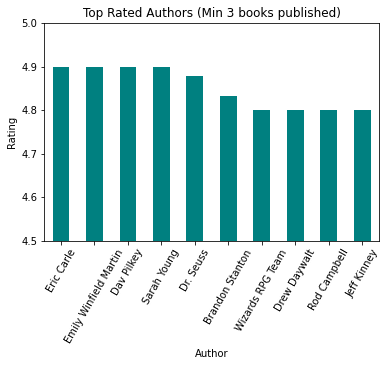

In [81]:
top_rated_authors['Rating'].plot(kind='bar',color='teal')
plt.title("Top Rated Authors (Min 3 books published)")
plt.ylabel("Rating")
plt.xticks(rotation=60)
plt.ylim(4.5, 5) 

# Correlation Heatmap of all numeric Columns

Text(0.5, 1.0, 'Correlation Heatmap: Rating, Reviews, Price')

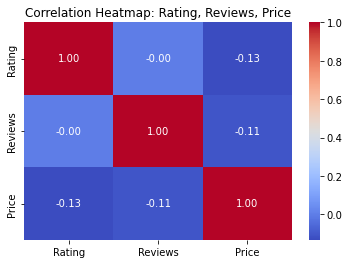

In [83]:
numeric_cols = df[['Rating','Reviews','Price']]
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap: Rating, Reviews, Price")

Closer to 1 = strong positive correlation
Closer to -1 = strong negative correlation
Close to 0 = no correlation

📌 Conclusion
This EDA explored key insights from Amazon's Bestseller Books dataset. Here's a summary:

📚 Fiction vs Non-Fiction: Fiction books were more common but both genres had similarly high average ratings.

👨‍💻 Top Authors: Jeff Kinney dominated the charts in terms of frequency and popularity.

💬 Review Trends: Review counts grew sharply post-2012, indicating increasing user engagement.

💵 Price Insights: Book prices dropped slightly over time, possibly due to digital formats.

⭐ Ratings: Average ratings steadily increased over the years, reflecting growing user satisfaction.

📈 Custom Score helped rank books by combining quality, popularity, and price — giving a holistic view of "value".

This analysis helps understand market trends, author impact, and reader behavior in the bestselling book segment.